**Tesla Inc. stock price prediction model**

Predicting stock prices by analyzing it's previous year's stock prices is categorized in **Supervised Machine Learning** as we are going to predcit data based on past data(Labeled data)

For this prediction model we are using Tesla Inc. stock data taken from yahoo finance page. Here is the link
https://finance.yahoo.com/quote/TSLA/

We are going to use an artificial Recurrent Neural Networks(RNN) called Long Short Term Memory(LSTM) to predict the closing stock price of Tesla Inc.

The LSTM model is  specifically designed unit of logic that will help reduce the vanishing gradient problem sufficiently to make recurrent neural networks more useful for long-term memory tasks for example the machine learning model we want to build is a sequence prediction model where LSTM model works very effectively.

We can describe our procedure in some points 

1. **Getting the data**

We will collect our data for predicting Tesla Inc. stock prices from yahoo finance page
https://finance.yahoo.com/quote/TSLA/

2. **EDA(Exploratory Data Analysis)**

After getting the data we will try to get a closer look in our data. We can evaluate the data in different diagrams to understand it well.

3. **Splitting & reshaping the data to make ready for the machine learning model** 

When we understand our data we will start to make it ready for the model. In this part we will have to reshape the data to fit in the model and split the data for training set and test set.

4. **Building the model**

We will build a LSTM model for this stock prediction project. As we want to predict data for 7 days we have to train the model in a way that it can predict accordingly.

5. **Testing our model**

Finally we can test our model on our test set and observe how it performs there.
Then we can compare our model's performance.











In [1]:
# First we will have to import different libraries

import math # as we want to perform different types of mathematical functions
import pandas_datareader as web # to collect the data from yahoo finance page 
import numpy as np # NumPy is used for scientific computing and data analysis
import pandas as pd # to create dataframe and manipulate it to fit the data in the model
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential # this is our model that we will use 
from keras.layers import Dense, LSTM # to change the default model according to our need 
import matplotlib.pyplot as plt # to show different types of diagrams to visualize our data
plt.style.use("fivethirtyeight") # style of the diagrams 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
# Get the stock price data from yahoo finance page using pandas_datareader
df = web.DataReader("TSLA", data_source = "yahoo", start = "2012-01-01", end = "2020-07-01")
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000
...,...,...,...,...,...,...
2020-06-25,985.979980,937.150024,954.270020,985.979980,9254500,985.979980
2020-06-26,995.000000,954.869995,994.780029,959.739990,8854900,959.739990
2020-06-29,1010.000000,948.520020,969.010010,1009.349976,9026400,1009.349976


In [3]:
# Get the number of rows and columns in the data set
df.shape

(2138, 6)

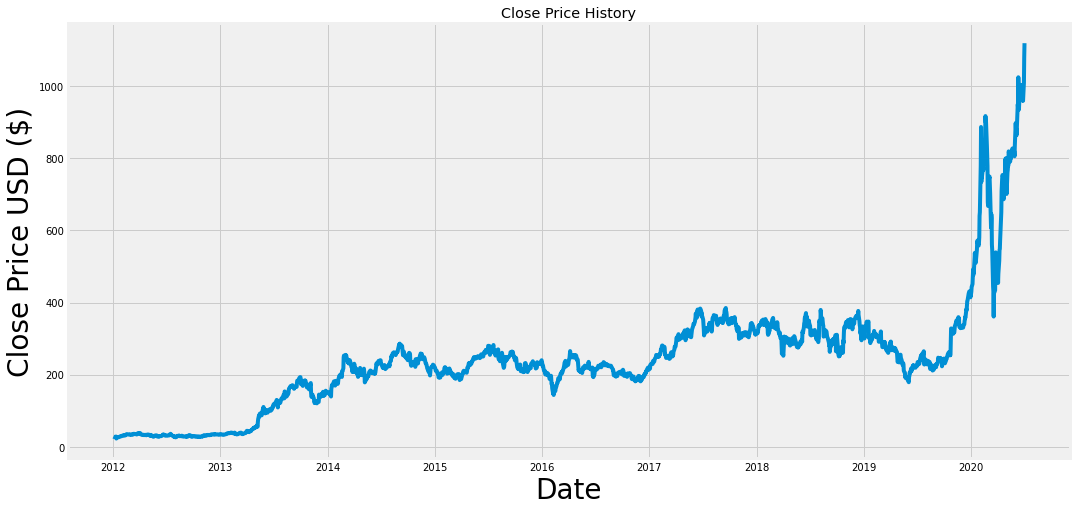

In [5]:
# Visualize the closing price history using matplotlib.pyplot
 
plt.figure(figsize = (16, 8)) # creating the diagram and giving the size of it
plt.title("Close Price History") # giving the title of the diagram
plt.plot(df["Close"]) # choosing the specific column from the dataset
plt.xlabel("Date", fontsize = 28) # giving title to x-axis and setting the fontsize
plt.ylabel("Close Price USD ($)", fontsize = 28) # giving title to y-axis
plt.show() # to show the diagram

In [7]:
# Create a new dataframe with only the "Close column"
data = df.filter(["Close"])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8) # here we are taking 80% data from the total data set as training data set and keeping away left 20% data for test set. It's one of the key concept of creating machine learning model. We can split the data in a way that training data set consists around (70-80)% data and the rest for valid data set and test data set. 
# we are also using our math library that we imported in the beginning to perform mathematical action.
training_data_len

1711

In [8]:
# Scale the data. Here we are converting our data values into a range of 0 to 1. So we can analyze and predict the value in 0 and 1 format then we can again convert to it's normal value to get the predicted price in normal value. 
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00482294],
       [0.00448561],
       [0.0039477 ],
       ...,
       [0.89945659],
       [0.96369576],
       [1.        ]])

In [9]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []
# we will loop through the train_data in range of 7 days. Because we want to make prediction for 7 days. 
for i in range(7, len(train_data)):
  x_train.append(train_data[i - 7:i, 0]) # filling our empty x_train with these values
  y_train.append(train_data[i, 0]) # filling our empty y_train with these values
  if i <= 8:
    print(x_train) # printing values for x_train
    print(y_train) # printing values for y_train
    print() # to create a new space of line in the end

[array([0.00482294, 0.00448561, 0.0039477 , 0.00375624, 0.00406623,
       0.00440356, 0.0049597 ])]
[0.004977935765219873]

[array([0.00482294, 0.00448561, 0.0039477 , 0.00375624, 0.00406623,
       0.00440356, 0.0049597 ]), array([0.00448561, 0.0039477 , 0.00375624, 0.00406623, 0.00440356,
       0.0049597 , 0.00497794])]
[0.004977935765219873, 0.0]



In [10]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshaping the data. We have to reshape the data because LSTM model takes data set in (x, y, z) format but our data set is in (x, y) format. so we have reshape our data using NumPy.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape # to show the reshaped data

(1704, 7, 1)

In [12]:
# Build the LSTM model. At last we are building our model.

model = Sequential() # we imported this model from keras library for this prediction model
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1))) # here we are customizing our model. We are setting 50 neural networks at the first then we are setting True return_sequences because we want to train y_train data set after this and then as x_train is the first data set we have to give an input shape.    
model.add(LSTM(50, return_sequences=False)) # same as first parameter used in x_train but here we are setting False return_sequences because we don't have any data set to train after this and we already gave the input shape before so no need for that again here.
model.add(Dense(25)) # adding 24 dense layers to the model
model.add(Dense(1)) # adding 1 dense layers to the model

In [13]:
# Compile the model. We will compile the model with adam optimizer and mean_squared_error as loss function. mean_squared_error is the square of the difference between the predicted and actual target variables, divided by the number of data points. By evaluating this we can make an assumption how good our model worked . The less the value, the better the moddel. 
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [14]:
# Train the model. 
model.fit(x_train, y_train, batch_size=1, epochs=1) # here we are setting the batch size and epochs for the model as 1. We can use more epochs, in that case it will take more time to fit the data into model.  

Epoch 1/1
1704/1704 [==============================] - 13s 8ms/step - loss: 3.9476e-04


In [15]:
# Create the testing data set
# Create a new array containing scaled values from index 1704 to 2138
test_data = scaled_data[training_data_len - 7: , :] # here we are using the left separated data we saved for testing purpose
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :] # this is the data set we are going to predict
for i in range(7, len(test_data)): # looping through in the range of 7 days to predict data for 7 days as instructed for the project 
  x_test.append(test_data[i - 7:i, 0])

In [16]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [17]:
# Reshape the data. As we did before fro the training data set. We have to reshape the data because LSTM model takes data set in (x, y, z) format but our data set is in (x, y) format. so we have reshape our data using NumPy. 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(427, 7, 1)

In [18]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
# Get the root mean squared error(RMSE). We can also use math library functions here but the way this code is written it will be easy to understand what are we actually doing.
rmse = np.sqrt(np.mean(predictions - y_test) ** 2) # RMSE gives us a idea about the accuracy of our model. The less the better.
rmse

16.731379131522615

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


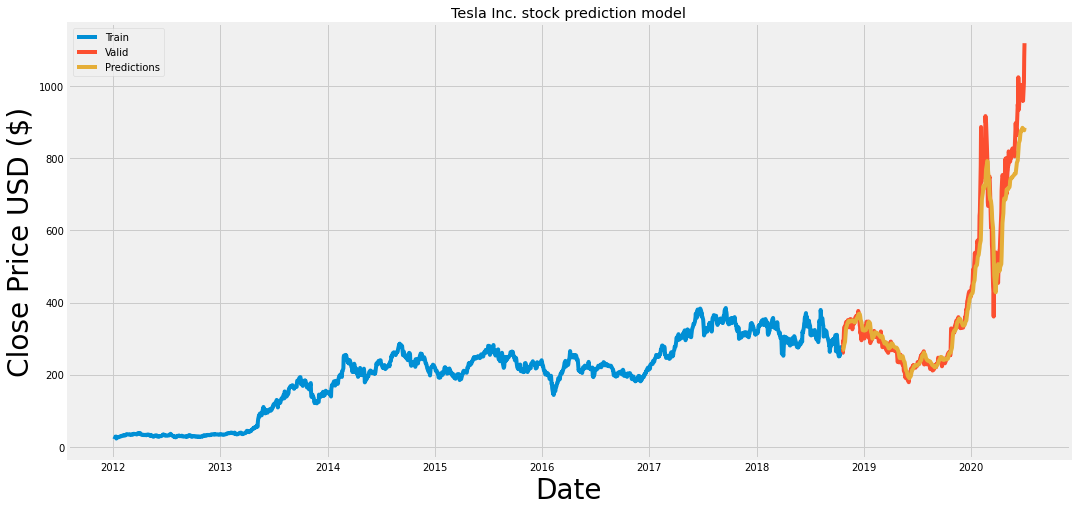

In [21]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions

# Visualize the data
plt.figure(figsize = (16, 8))
plt.title("Tesla Inc. stock prediction model")
plt.xlabel("Date", fontsize = 28)
plt.ylabel("Close Price USD ($)", fontsize = 28)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Valid", "Predictions"])
plt.show();

In [22]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-10-19,260.000000,267.838440
2018-10-22,260.950012,268.758606
2018-10-23,294.140015,269.599548
2018-10-24,288.500000,272.826050
2018-10-25,314.859985,276.936890
...,...,...
2020-06-25,985.979980,882.638245
2020-06-26,959.739990,881.787659
2020-06-29,1009.349976,878.429565


In [23]:
# We will go through the same process we did in the above
# Get the data from yahoo finance 
tesla_data = web.DataReader("TSLA", data_source = "yahoo", start = "2012-01-01", end = "2020-07-22")
# Create a new dataframe
new_df = tesla_data.filter(["Close"])
# Get the last 7 days closing price values and convert the dataframe to an array
last_7_days = new_df[-7:].values
# Scale the data to be values between 0 and 1
last_7_days_scaled = scaler.transform(last_7_days)
# Create an empty list
X_test = []
# Append the past 7 days 
X_test.append(last_7_days_scaled)
# Convert the X_test data set to a numpt array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1205.7518]]


In [29]:
# Now we are comparing our predicted value with the actual value 
tesla_data_2 = web.DataReader("TSLA", data_source = "yahoo", start = "2020-07-22", end = "2020-07-29")
print(tesla_data_2["Close"])

Date
2020-07-22    1592.329956
2020-07-23    1513.069946
2020-07-24    1417.000000
2020-07-27    1539.599976
2020-07-28    1476.489990
2020-07-29    1499.109985
Name: Close, dtype: float64
